# Análise dinâmica de sistemas discretos

## Equações de diferenças

São análogas às equações diferenciais, porém ao invés de derivadas, a função de saída aparece deslocada no tempo, p.ex.: $y[k+1]$, $y[k-2]$. Neste caso, a resposta é uma sequência de valores, que pode ser obtida resolvendo a equação analiticamente ou numericamente (mais fácil).

Um exemplo clássico é a equação de Fibonacci: $y[k+2] = y[k+1]+y[k]$, com $y[0]=0$, $y[1]=1$. Experimente calcular.

A implementação dessas equações é trivial usando *loops* (estruturas de repetição) computacionais. É desta forma que implementamos um controlador no programa de microcontrolador.

Sequência de Fibonacci:  [ 0.  1.  1.  2.  3.  5.  8. 13. 21. 34.]


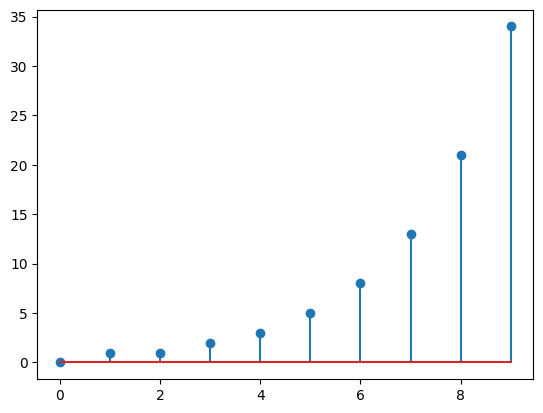

In [1]:
import numpy as np
from matplotlib import pyplot as plt
y = np.zeros(10)
y[0] = 0
y[1] = 1
for k in range(len(y)-2):
    y[k+2] = y[k+1] + y[k]
    
print('Sequência de Fibonacci: ', y)
plt.stem(y);

Equações de diferenças representativas de sistemas reais podem surgir basicamente de duas formas:  
(a) Da discretização do sistema contínuo (equivalente discreto)  
(b) Da identificação do sistema contínuo usando regressão linear (identificação de sistemas)

## Função de transferência discreta

O procedimento para encontrar a função de transferência discreta é o mesmo aplicado a equações diferenciais, apenas atentando para a propriedade $\mathcal{Z}\{y[k+1]\}=zY(z)$ ou $\mathcal{Z}\{y[k-1]\}=z^{-1}Y(z)$

**Exemplo:** 
$$
\begin{align}
    y[k+2] + 10y[k] = 8x[k-1]
\end{align}
$$

Aplicando a transformada $\mathcal{Z}$
$$
\begin{align}
   z^2Y(z) + 10Y(z) &=8z^{-1}X(z)\\
   (z^2+10)Y(z) &= \frac{8X(z)}{z}\\
   \frac{Y(z)}{X(z)} &= \frac{8}{z(z^2+10)}
\end{align}
$$



Da mesma forma que o caso contínuo, definimos para funções de transferência discretas:
- Pólos: raízes do denominador
- Zeros: raízes do numerador

As características dos pólos do sistema definem que tipo de resposta ele vai apresentar.

**Estabilidade**
 - O sistema é estável se todos os pólos estão dentro do círculo unitário $|z|<1$
 - O sistema é instável se um ou mais pólos estão fora do círculo unitário $|z|\geq 1$

**Tipo de resposta**
 - Sobre amortecida ($\xi>1$): pólos reais e distintos
 - Criticamente amortecida ($\xi=1$): pólos reais e iguais
 - Sub amortecida ($\xi<1$): pólos imaginários conjugados estáveis
 - Oscilatória (senoidal pura): pólos imaginários em cima do círculo $|z|=1$
 - Alternante (oscila, mas não senoidal): pólos reais negativos
 - Integrador: $z=1$

<center> <img src="Fig8.5.svg"> </center>

In [55]:
import control as ct
import numpy as np

T = 0.1
s1 = np.array([-1,-5])
s2 = np.array([-1,-1])
s3 = np.array([-1+1j, -1-1j])
s4 = np.array([1j, -1j])

z1 = np.exp(s1*T)
z2 = np.exp(s2*T)
z3 = np.exp(s3*T)
z4 = np.exp(s4*T)

num1 = [1,0,0]
num2 = np.poly([.85,0])
den = np.poly(z4)
H1 = ct.tf(num1,den,T)
H1 = H1/H1.dcgain()
H2 = ct.tf(num2,den,T)
H2 = H2/H2.dcgain()

_ = ct.damp(H1)
print(ct.zero(H1))
H

_____Eigenvalue______ Damping___ Frequency_
     0.995  +0.09983j -5.551e-16          1
     0.995  -0.09983j -5.551e-16          1
[0.+0.j 0.+0.j]


TransferFunction(array([ 1.  , -0.85]), array([ 16.56375604, -29.9750125 ,  13.56125646]), 0.1)

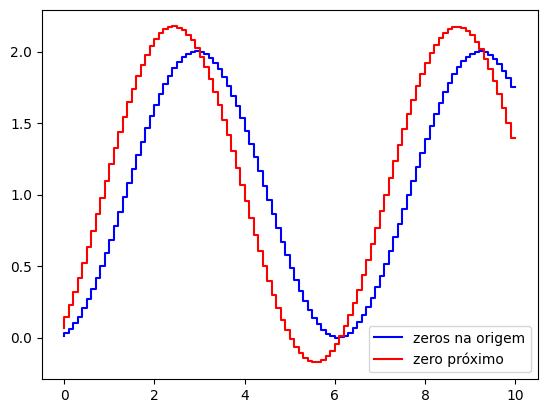

In [56]:
t,y1 = ct.step_response(H1,10)
t,y2 = ct.step_response(H2,10)
plt.step(t,y1,'b',t,y2,'r')
plt.legend(['zeros na origem','zero próximo'])
plt.show()

## Ganho DC

Para um sistema contínuo sem pólos na origem, o ganho DC é o valor da da função de transferência quando $s\rightarrow 0$. O ganho DC informa o quanto a saída vai aumentar ou diminuir em relação à entrada, quando esta é um sinal constante. 

O ganho DC discreto possui a mesma interpretação, mas devido ao mapeamento no plano $z$, ele é definido como o valor da função de transferência quando $z\rightarrow 1$. 

**Exemplo:** $G(z) = \displaystyle \frac{0.0009(z+1)^2}{z(z-0.9)(z-0.8e^{j0.1})(z-0.8e^{-j0.1})}$

Como todos os pólos são estáveis:
$$
\begin{align}
K_{dc} &= G(1) = \frac{0.0009\cdot(1+1)^2}{1\cdot(1-0.9)\cdot(1-0.8e^{j0.1})\cdot(1-0.8e^{-j0.1})}
\end{align}
$$

In [57]:
import sympy as sp
from IPython.display import display, Math

dmath = lambda s: display(Math(s))

z = sp.symbols('z')
G = 0.0009*(z+1)**2/(z*(z-0.9)*(z-0.8*sp.exp(.1j))*(z-0.8*sp.exp(-.1j)))
dmath('G(z) = ' + sp.latex(G))
dmath(r'K_{dc} = ' + sp.latex(G.subs(z,1)))
dmath(r'K_{dc} = ' + sp.latex(G.subs(z,1).evalf(6)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Ganho DC:  0.7501041464106208



<IPython.core.display.Math object>

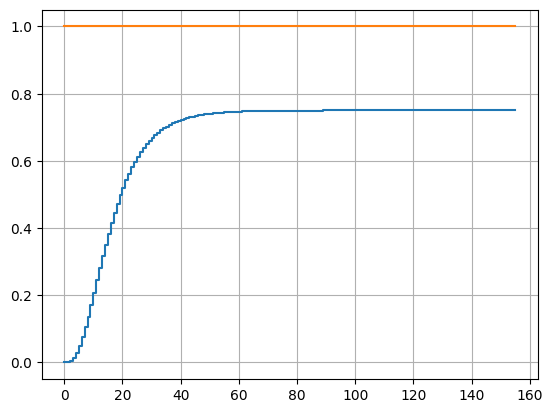

In [58]:
# Ou usando apenas o pacote control
num = 9e-4*np.poly([-1,-1])
den = np.poly([0,0.9,0.8*np.exp(0.1j),0.8*np.exp(-0.1j)])
Gz = ct.tf(num,den,1)       # Período de amostragem não foi dado, então usamos 1
print('Ganho DC: ', Gz.dcgain())
print('')
t,y = ct.step_response(Gz)
degrau = np.ones(t.size)
plt.step(t,y,t,degrau);
plt.grid()
dmath(r'y[\infty] = ' + f'{y[-1]}')

Quando o sistema possui um ou mais integradores, o ganho DC é calculado da mesma forma, porém removendo os integradores. A interpretação nesse caso é diferente, por ele mede o erro não mais em relação a um degrau, mas a uma entrada equivalente ao número de integradores (rampa, parábola, etc.)